In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Google Play Store Analysis/googleplaystore.csv')

In [3]:
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


**Data Preparation**

In [4]:
df.shape

(10841, 13)

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
print(df['Installs'].min(), df['Installs'].max())

0 Free


We can see one or more than one row ha value of installs as 'Free'

In [9]:
print(df['Installs'].unique())
print('\n')
print(df[df['Installs'] == 'Free'])

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


                                           App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]


So the 10472nd row has the value as 'Free' we need to remove that

In [10]:
df.drop(df.index[10472], inplace = True, axis = 0)
df[df['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [11]:
len(df['App'].unique())

9659

**So, we can see that there are multiple app data with the same name**

In [12]:
df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
ESPN                                                 7
8 Ball Pool                                          7
                                                    ..
EO Global                                            1
বাংলা টিভি প্রো BD Bangla TV                         1
Planet of Cubes Survival Craft                       1
Sticker Market: Emoji keyboard                       1
du View                                              1
Name: App, Length: 9659, dtype: int64

In [13]:
df[df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


As we can see from the above example, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time.

Dropping the duplicates

In [14]:
df.drop_duplicates(subset = ['App'], inplace = True)

In [15]:
df[df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [16]:
df.reset_index()
df.shape

(9659, 13)

Working on 'Installs' column

In [17]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Removing '+' symbol from the values

In [18]:
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [19]:
# converting 'Installs' column data type to int64 
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',', ''))

In [20]:
df['Installs'].min(), df['Installs'].max()

(0, 1000000000)

We can notice there is a high variance in the number of installs. To remove this we are adding a new column to dataframen which is the log of installs

In [21]:
df['log_Installs'] = np.log10(df['Installs'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4.00000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,6.69897
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,7.69897
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,5.00000


Checkking the 'Price' column

In [23]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Removing '$' from the values and converting it into numeric data type

In [24]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('$', ''))

Converting 'Reviews' column to numeric data type

In [25]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

'Size' column

In [26]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

We can see that some sizes are in KB and some in MB. Son converting KB into MB

In [27]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

**EDA**

Setting up the Parameters


In [28]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

Top 20 apps present in google play store as per their genres

In [29]:
top_genres = df['Genres'].value_counts().reset_index().rename(columns = {'Genres': 'Count', 'index': 'Genres'})
top_genres

,Genres,Count
0,Tools,826
1,Entertainment,561
2,Education,510
3,Business,420
4,Medical,395
...,...,...
113,Health & Fitness;Action & Adventure,1
114,Casual;Music & Video,1
115,Art & Design;Action & Adventure,1
116,Comics;Creativity,1


In [30]:
genre_installs = df.groupby(['Genres'])[['Installs']].sum()
genre_installs

,Installs
Genres,
Action,3483039190
Action;Action & Adventure,53020500
Adventure,296695320
Adventure;Action & Adventure,106150000
Adventure;Brain Games,100000
...,...
Video Players & Editors,3916902720
Video Players & Editors;Creativity,5000000
Video Players & Editors;Music & Video,15000000


In [31]:
top_genre_installs = pd.merge(top_genres, genre_installs, on = 'Genres')
top_20 = top_genre_installs.head(20)
top_20

,Genres,Count,Installs
0,Tools,826,7991771915
1,Entertainment,561,3014714684
2,Education,510,258410148
3,Business,420,697164865
4,Medical,395,38193177
5,Personalization,376,1532494782
6,Productivity,374,5793091369
7,Lifestyle,368,493823539
8,Finance,345,455348734
9,Sports,331,1412474498


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


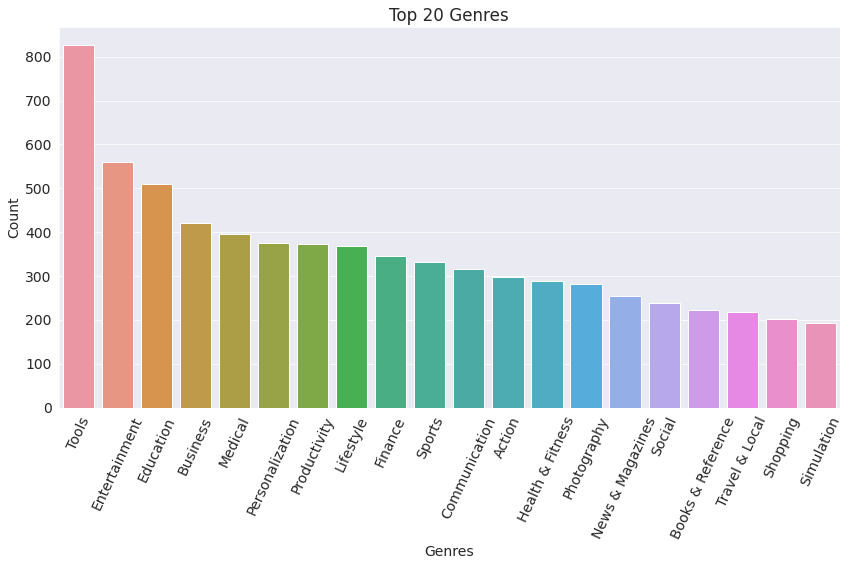

In [32]:
plt.figure(figsize = (14, 7))
plt.xticks(rotation = 65)
plt.xlabel('Genres')
plt.ylabel('Number of application')
plt.title('Top 20 Genres')
sns.barplot(top_20.Genres, top_20.Count)
plt.show()

Genres that are getting installed the most in top 20 Genres

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


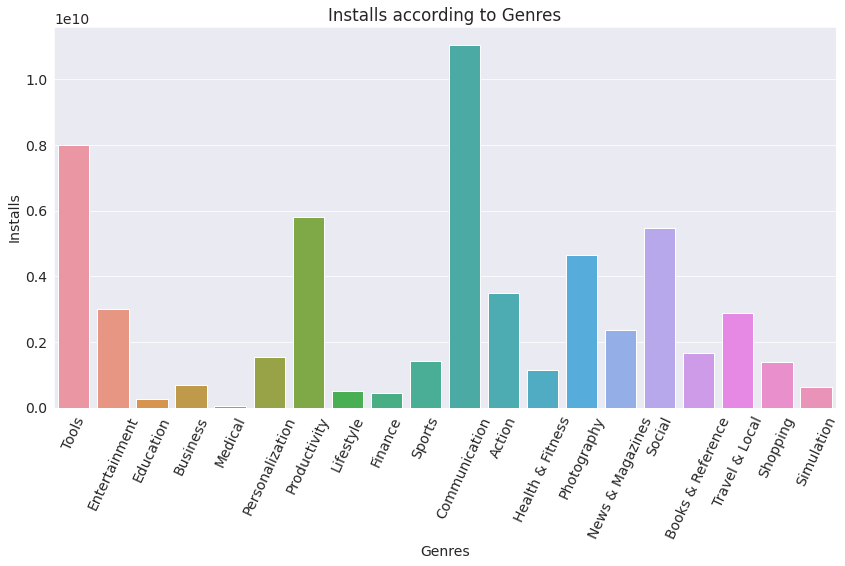

In [33]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20.Genres, top_20.Installs)
plt.show()

As we can see from the above two plots: Maxinum number of apps present in google play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

Top 20 categories present in google play store

In [34]:
top_category = df['Category'].value_counts().reset_index().rename(columns = {'Category': 'Count', 'index': 'Category'})
top_category

,Category,Count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [35]:
category_installs = df.groupby(['Category'])[['Installs']].sum()
category_installs

,Installs
Category,
ART_AND_DESIGN,114338100
AUTO_AND_VEHICLES,53130211
BEAUTY,27197050
BOOKS_AND_REFERENCE,1665969576
BUSINESS,697164865
COMICS,44981150
COMMUNICATION,11038276251
DATING,140926107
EDUCATION,352952000


In [36]:
top_category_installs = pd.merge(top_category, category_installs, on = 'Category')
top_20_category = top_category_installs.head(20)
top_20_category

,Category,Count,Installs
0,FAMILY,1832,4427941505
1,GAME,959,13878924415
2,TOOLS,827,8001771915
3,BUSINESS,420,697164865
4,MEDICAL,395,38193177
5,PERSONALIZATION,376,1532494782
6,PRODUCTIVITY,374,5793091369
7,LIFESTYLE,369,503823539
8,FINANCE,345,455348734
9,SPORTS,325,1096474498


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


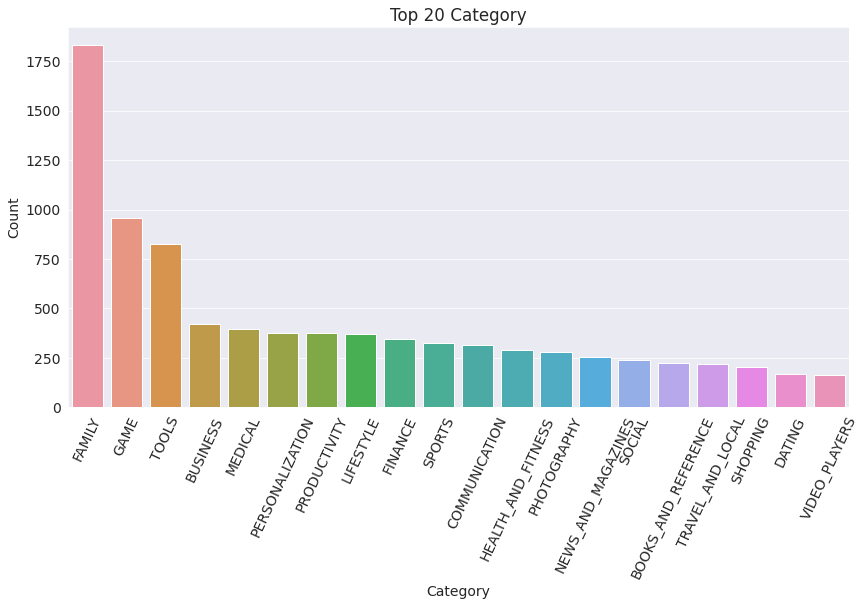

In [37]:
plt.figure(figsize = (14, 7))
plt.xticks(rotation = 65)
plt.xlabel('Category')
plt.ylabel('Number of Application')
plt.title('Top 20 Category')
sns.barplot(top_20_category.Category, top_20_category.Count)
plt.show()

Categories that are installed the most on play store

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


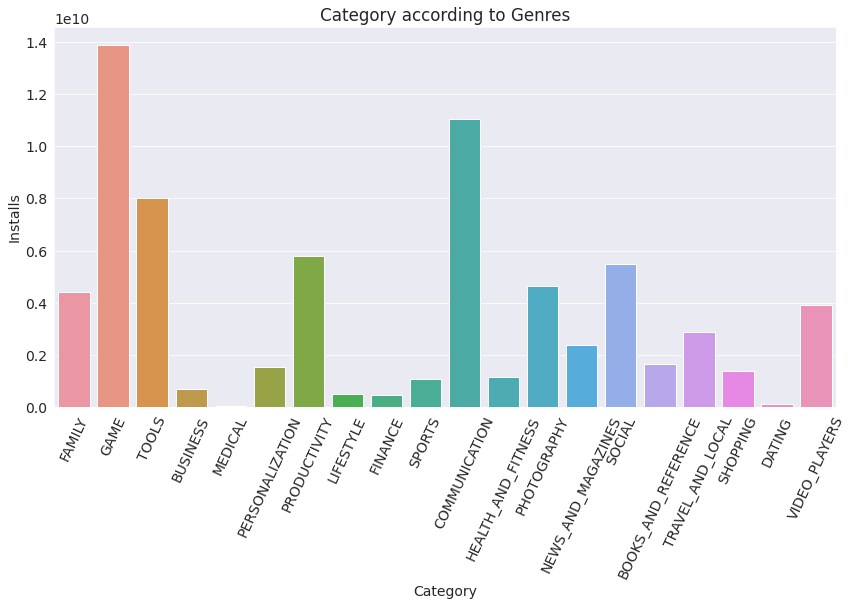

In [38]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Category according to Genres")
sns.barplot(top_20_category.Category, top_20_category.Installs)
plt.show()

As we can see from the above two plots: Maxinum number of apps present in google play store comes under Family, Games and Tools Category but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games, Communication and Tools.

**Average Rating**

In [39]:
genre_rating_df = df.groupby(['Genres'])[['Rating']].mean()
genre_rating_df

,Rating
Genres,
Action,4.244863
Action;Action & Adventure,4.316667
Adventure,4.178873
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000
...,...
Video Players & Editors,4.044898
Video Players & Editors;Creativity,4.100000
Video Players & Editors;Music & Video,4.000000


In [40]:
genre_install_ratings = pd.merge(top_genre_installs, genre_rating_df, on = 'Genres')
genre_install_ratings

,Genres,Count,Installs,Rating
0,Tools,826,7991771915,4.038912
1,Entertainment,561,3014714684,4.083439
2,Education,510,258410148,4.291375
3,Business,420,697164865,4.098479
4,Medical,395,38193177,4.166552
...,...,...,...,...
113,Health & Fitness;Action & Adventure,1,1000000,3.900000
114,Casual;Music & Video,1,10000000,4.100000
115,Art & Design;Action & Adventure,1,100000,NaN
116,Comics;Creativity,1,50000,4.800000


In [41]:
genre_install_ratings['Rating'].describe()

count    114.000000
mean       4.248680
std        0.182604
min        3.800000
25%        4.127083
50%        4.246502
75%        4.344442
max        4.800000
Name: Rating, dtype: float64

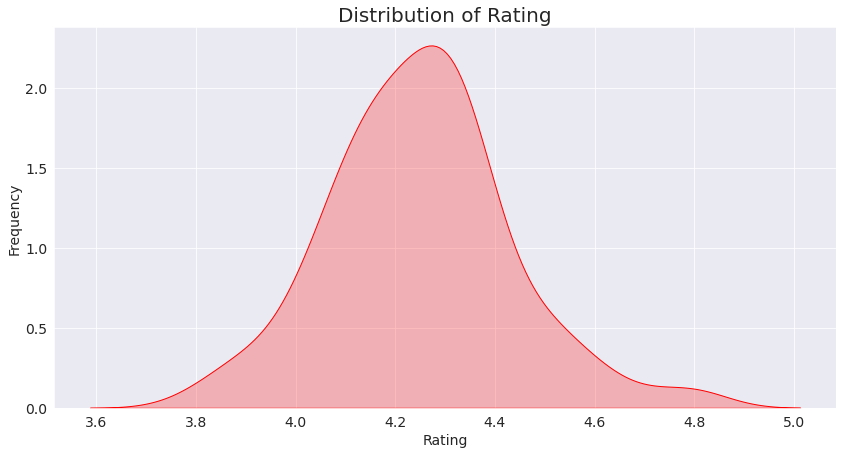

In [42]:
plt.figure(figsize = (14, 7))
g = sns.kdeplot(genre_install_ratings.Rating, color = 'Red', shade = True)
g.set_xlabel('Rating')
g.set_ylabel('Frequency')
plt.title('Distribution of Rating', size = 20)
plt.show()

**Highest and Lowest Rated Genres**

In [43]:
genre_install_ratings.sort_values('Rating', ascending = False, inplace = True)
genre_install_ratings

,Genres,Count,Installs,Rating
116,Comics;Creativity,1,50000,4.8
96,Board;Pretend Play,1,100,4.8
108,Health & Fitness;Education,1,100000,4.7
109,Puzzle;Education,1,100000,4.6
107,Adventure;Brain Games,1,100000,4.6
...,...,...,...,...
98,Parenting;Brain Games,1,1000000,3.8
102,Trivia;Education,1,100,NaN
103,Role Playing;Education,1,100,NaN
112,Books & Reference;Creativity,1,100,NaN


Top 20 highest and lowest rating genres

In [44]:
top_rated_genres = genre_install_ratings.iloc[0: 20]
low_rated_genres = genre_install_ratings.iloc[-20:]
low_rated_genres = low_rated_genres[low_rated_genres['Rating'].notnull()]

Top 20 highest rated genres

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


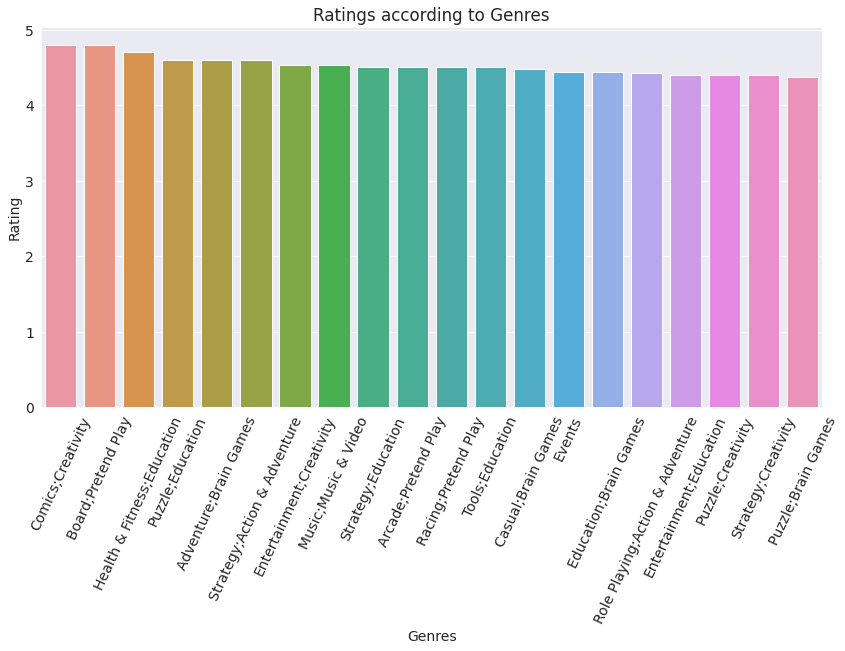

In [45]:
plt.figure(figsize = (14, 7))
plt.xticks(rotation = 65)
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.title('Ratings according to Genres')
sns.barplot(top_rated_genres.Genres, top_rated_genres.Rating)
plt.show()

Top 20 low rated genres

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


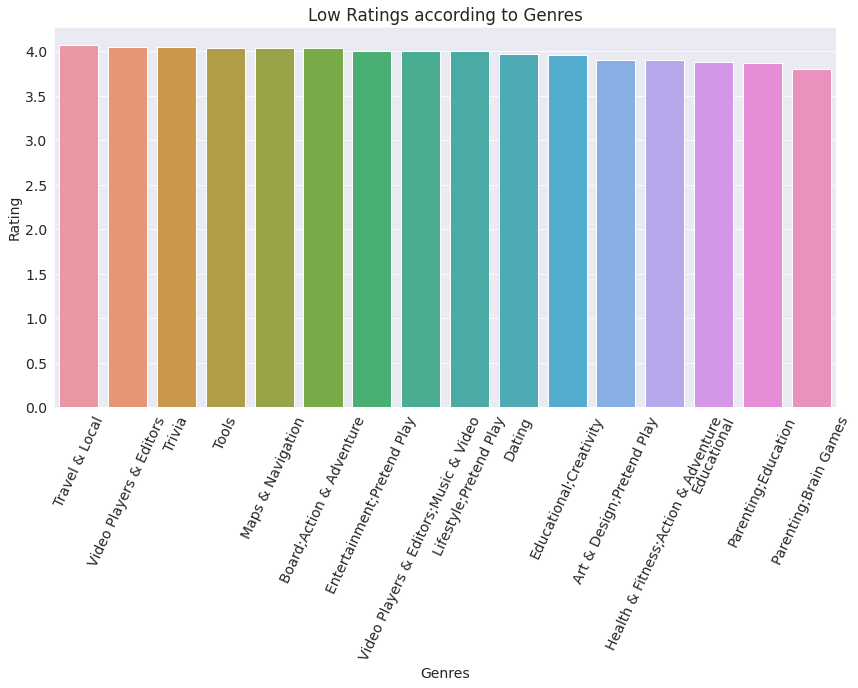

In [46]:
plt.figure(figsize = (14, 7))
plt.xticks(rotation = 65)
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.title('Low Ratings according to Genres')
sns.barplot(low_rated_genres.Genres, low_rated_genres.Rating)
plt.show()

The count of applications in each category differentiated by their type

In [47]:
app_count = df.groupby(['Category', 'Type'])[['App']].count().reset_index().rename(columns = {'App': 'Count', 'Index': 'App'})
app_count

,Category,Type,Count
0,ART_AND_DESIGN,Free,61
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,159
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,71


In [48]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
df_app_count

Type,Category,Free,Paid
0,ART_AND_DESIGN,61.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,0.0
3,BOOKS_AND_REFERENCE,194.0,28.0
4,BUSINESS,408.0,12.0
5,COMICS,56.0,0.0
6,COMMUNICATION,288.0,27.0
7,DATING,165.0,6.0
8,EDUCATION,115.0,4.0
9,ENTERTAINMENT,100.0,2.0


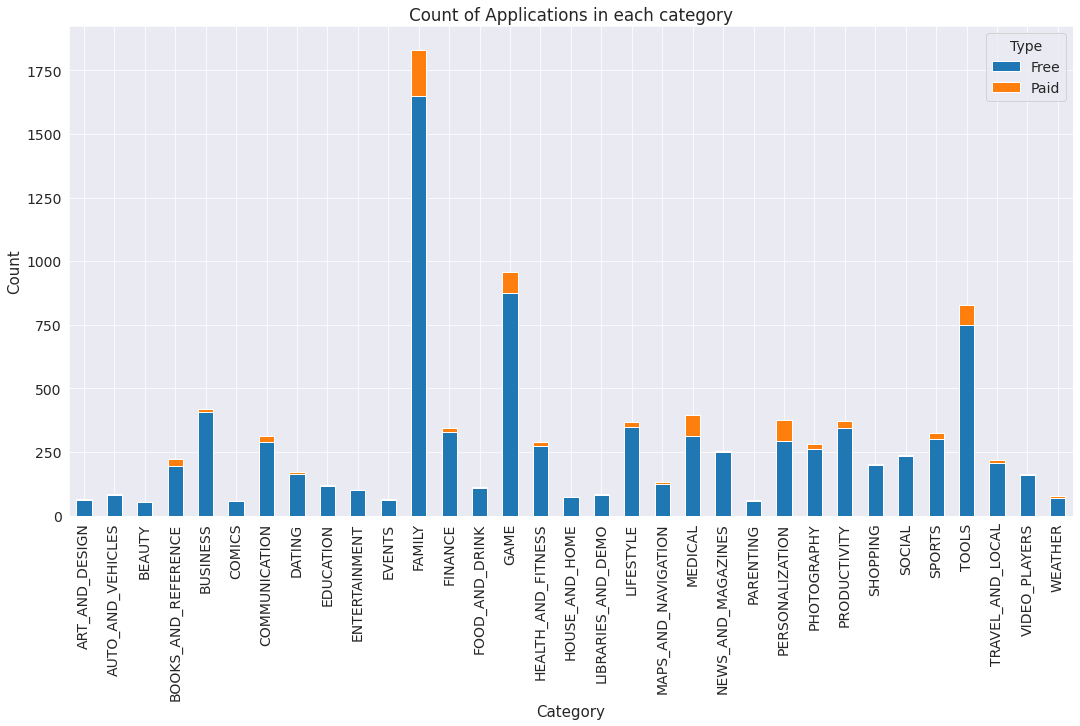

In [49]:
df_app_count.set_index('Category').plot(kind = 'bar', stacked = True, figsize = (18, 9))
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Applications in each category')
plt.show()

It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Food & Drink and Tools, as well as Social categories were free to install. At the same time Family, Sports, Tools and Medical categories had the biggest number of paid apps available for download.

In [50]:
categoty_type_installs = df.groupby(['Category', 'Type'])[['Installs']].sum().reset_index()
categoty_type_installs

,Category,Type,Installs
0,ART_AND_DESIGN,Free,114322100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,53080061
3,AUTO_AND_VEHICLES,Paid,50150
4,BEAUTY,Free,27197050
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,183060
59,VIDEO_PLAYERS,Free,3926831720
60,VIDEO_PLAYERS,Paid,71000
61,WEATHER,Free,360288520


In [51]:
categoty_type_installs['log_installs'] = np.log10(categoty_type_installs['Installs'])
categoty_type_installs

,Category,Type,Installs,log_installs
0,ART_AND_DESIGN,Free,114322100,8.058130
1,ART_AND_DESIGN,Paid,16000,4.204120
2,AUTO_AND_VEHICLES,Free,53080061,7.724931
3,AUTO_AND_VEHICLES,Paid,50150,4.700271
4,BEAUTY,Free,27197050,7.434522
...,...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,183060,5.262593
59,VIDEO_PLAYERS,Free,3926831720,9.594042
60,VIDEO_PLAYERS,Paid,71000,4.851258
61,WEATHER,Free,360288520,8.556650


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


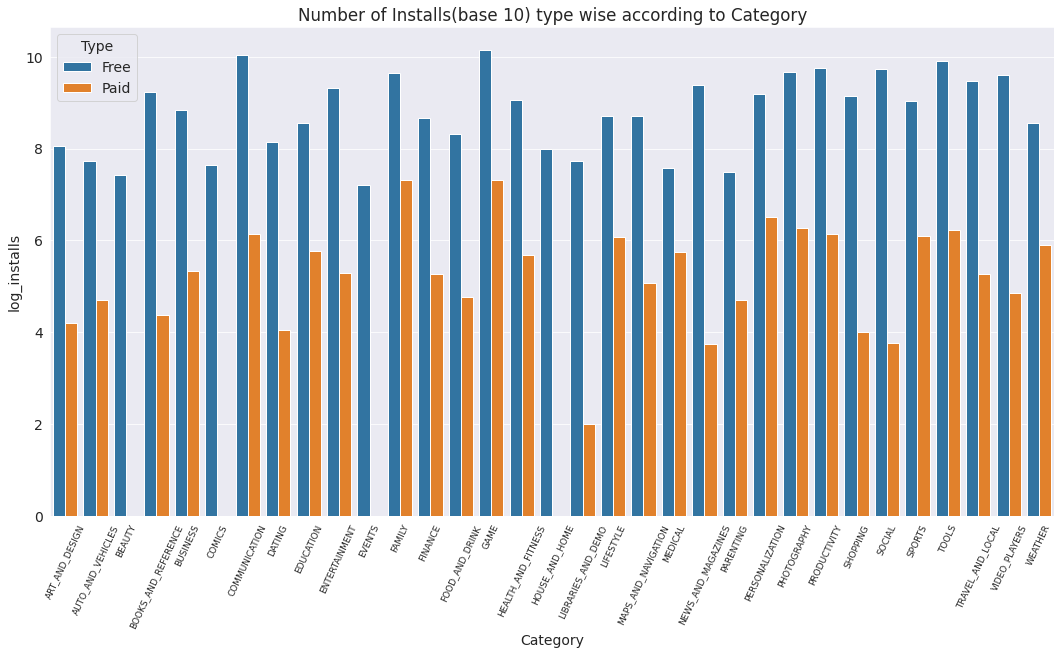

In [52]:
plt.figure(figsize = (18, 9))
plt.xticks(rotation = 65, fontsize = 9)
plt.xlabel('Category')
plt.ylabel('Installs(base 10')
plt.title('Number of Installs(base 10) type wise according to Category')
sns.barplot('Category', 'log_installs', hue = 'Type', data = categoty_type_installs)
plt.show()

It can be concluded that the number of free applications installed by the user are high when compared with the paid ones.

In [53]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4.00000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,6.69897
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,7.69897
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,5.00000


Checking the impact of size on the number of installs of any application

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


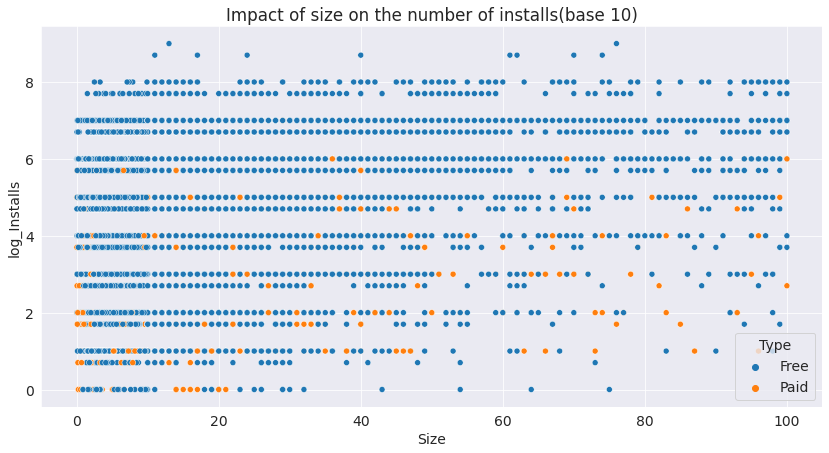

In [54]:
plt.figure(figsize = (14, 7))
plt.title('Impact of size on the number of installs(base 10)')
sns.scatterplot(df['Size'], df['log_Installs'], hue = df['Type'])
plt.show()

It is clear from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.

**Histogram of log installs**

In [55]:
df.loc[df['log_Installs'] == df['log_Installs'].min(), 'log_Installs'] = 0

(array([ 164.,  589., 1038.,  888., 1499., 1581., 1922., 1544.,  390.,
          44.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

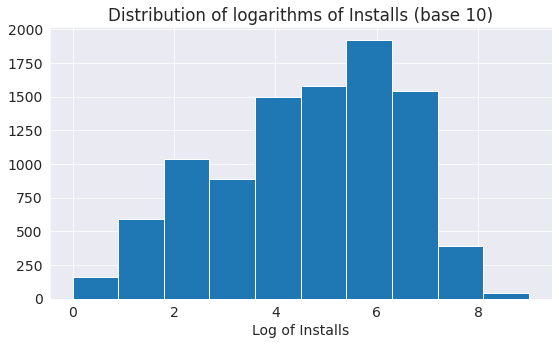

In [56]:
plt.xlabel('Log of Installs')
plt.title('Distribution of logarithms of Installs (base 10)')
plt.hist(df['log_Installs'])

**Histogram of size**

In [57]:
df.loc[df['Size'].isnull(), 'Size'] = 0

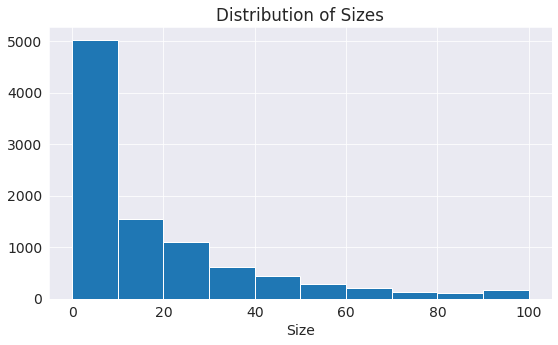

In [58]:
plt.xlabel('Size')
plt.title('Distribution of Sizes')
plt.hist(df['Size'])
plt.show()

We can see that maximum number of application present in the dataset are of small sizes

In [59]:
user_reviews = pd.read_csv('/content/drive/MyDrive/Projects/Google Play Store Analysis/googleplaystore_user_reviews.csv')
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Merging user review dataframe on app dataframe

In [60]:
merge_df = df.merge(user_reviews, on = 'App')
merge_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_Installs,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,I love colors inspyering,Positive,0.500,0.600000


In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].

Distribution of type of reviews in the dataset

In [61]:
category_sentiment = merge_df.groupby(['Category'])[['Sentiment']].size().reset_index(name = 'Sentiment Count')
category_sentiment

,Category,Sentiment Count
0,ART_AND_DESIGN,548
1,AUTO_AND_VEHICLES,603
2,BEAUTY,591
3,BOOKS_AND_REFERENCE,1112
4,BUSINESS,1600
5,COMICS,200
6,COMMUNICATION,2240
7,DATING,3098
8,EDUCATION,1860
9,ENTERTAINMENT,2180


In [62]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])
category_sentiment

,Category,Sentiment Count,log_sentiment_count
0,ART_AND_DESIGN,548,9.098032
1,AUTO_AND_VEHICLES,603,9.236014
2,BEAUTY,591,9.207014
3,BOOKS_AND_REFERENCE,1112,10.118941
4,BUSINESS,1600,10.643856
5,COMICS,200,7.643856
6,COMMUNICATION,2240,11.129283
7,DATING,3098,11.597121
8,EDUCATION,1860,10.861087
9,ENTERTAINMENT,2180,11.090112


**Histogram of Subjectivity**

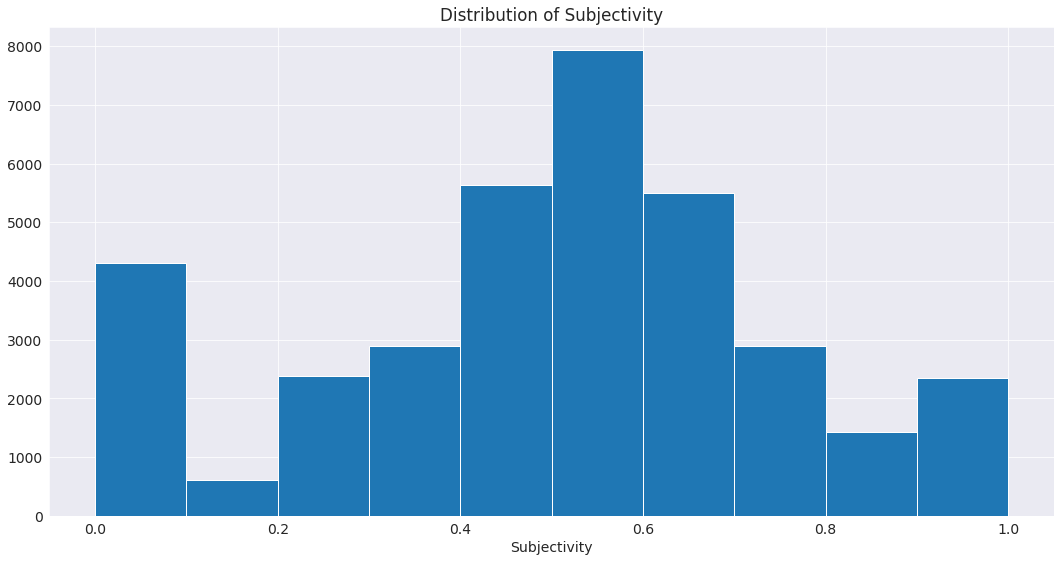

In [63]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merge_df[merge_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

Does sentiment_subjectivity proportional to sentiment_polarity?

In [64]:
sentiemnt_subjective_polarity = merge_df.groupby(['Category'])['Sentiment_Polarity', 'Sentiment_Subjectivity'].mean().reset_index().rename(columns = {'Sentiment_Polarity': 'Sentiment_Polarity_Avg', 'Sentiment_Subjectivity': 'Sentiment_Subjectivity_Avg'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [65]:
sentiemnt_subjective_polarity

,Category,Sentiment_Polarity_Avg,Sentiment_Subjectivity_Avg
0,ART_AND_DESIGN,0.234735,0.537098
1,AUTO_AND_VEHICLES,0.348683,0.529918
2,BEAUTY,0.193360,0.494510
3,BOOKS_AND_REFERENCE,0.248422,0.476268
4,BUSINESS,0.232189,0.444924
5,COMICS,0.440031,0.558521
6,COMMUNICATION,0.177275,0.486109
7,DATING,0.178846,0.510476
8,EDUCATION,0.279332,0.493070
9,ENTERTAINMENT,0.131206,0.477160


In [66]:
merge_df['Sentiment_Polarity'] = merge_df['Sentiment_Polarity'].abs()
merge_df['Sentiment_Subjectivity'] = merge_df['Sentiment_Subjectivity'].abs()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


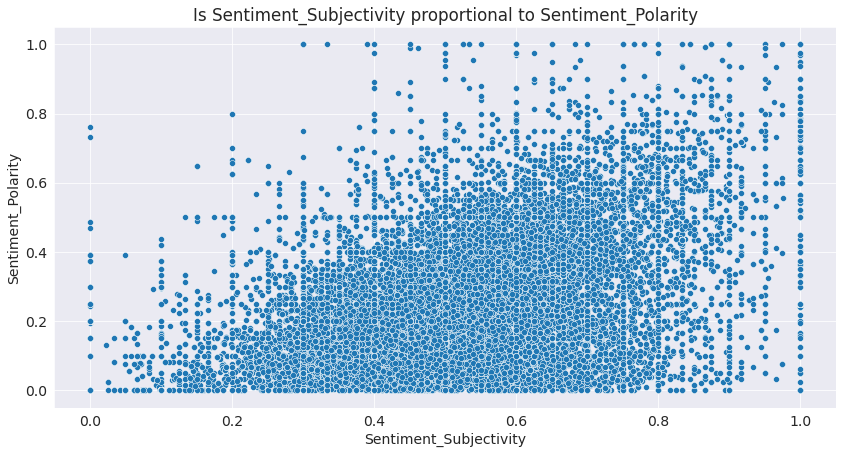

In [67]:
plt.figure(figsize = (14, 7))
sns.scatterplot(merge_df['Sentiment_Subjectivity'], merge_df['Sentiment_Polarity'], data = merge_df)
plt.title('Is Sentiment_Subjectivity proportional to Sentiment_Polarity')
plt.show()

We can conclude that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of cases, it shows a proportional behavior, when variance is too high or low.

**WORDCLOUD of reviews**

In [68]:
!pip install wordcloud

In [69]:
review_not_null = merge_df[merge_df['Translated_Review'].notnull()]

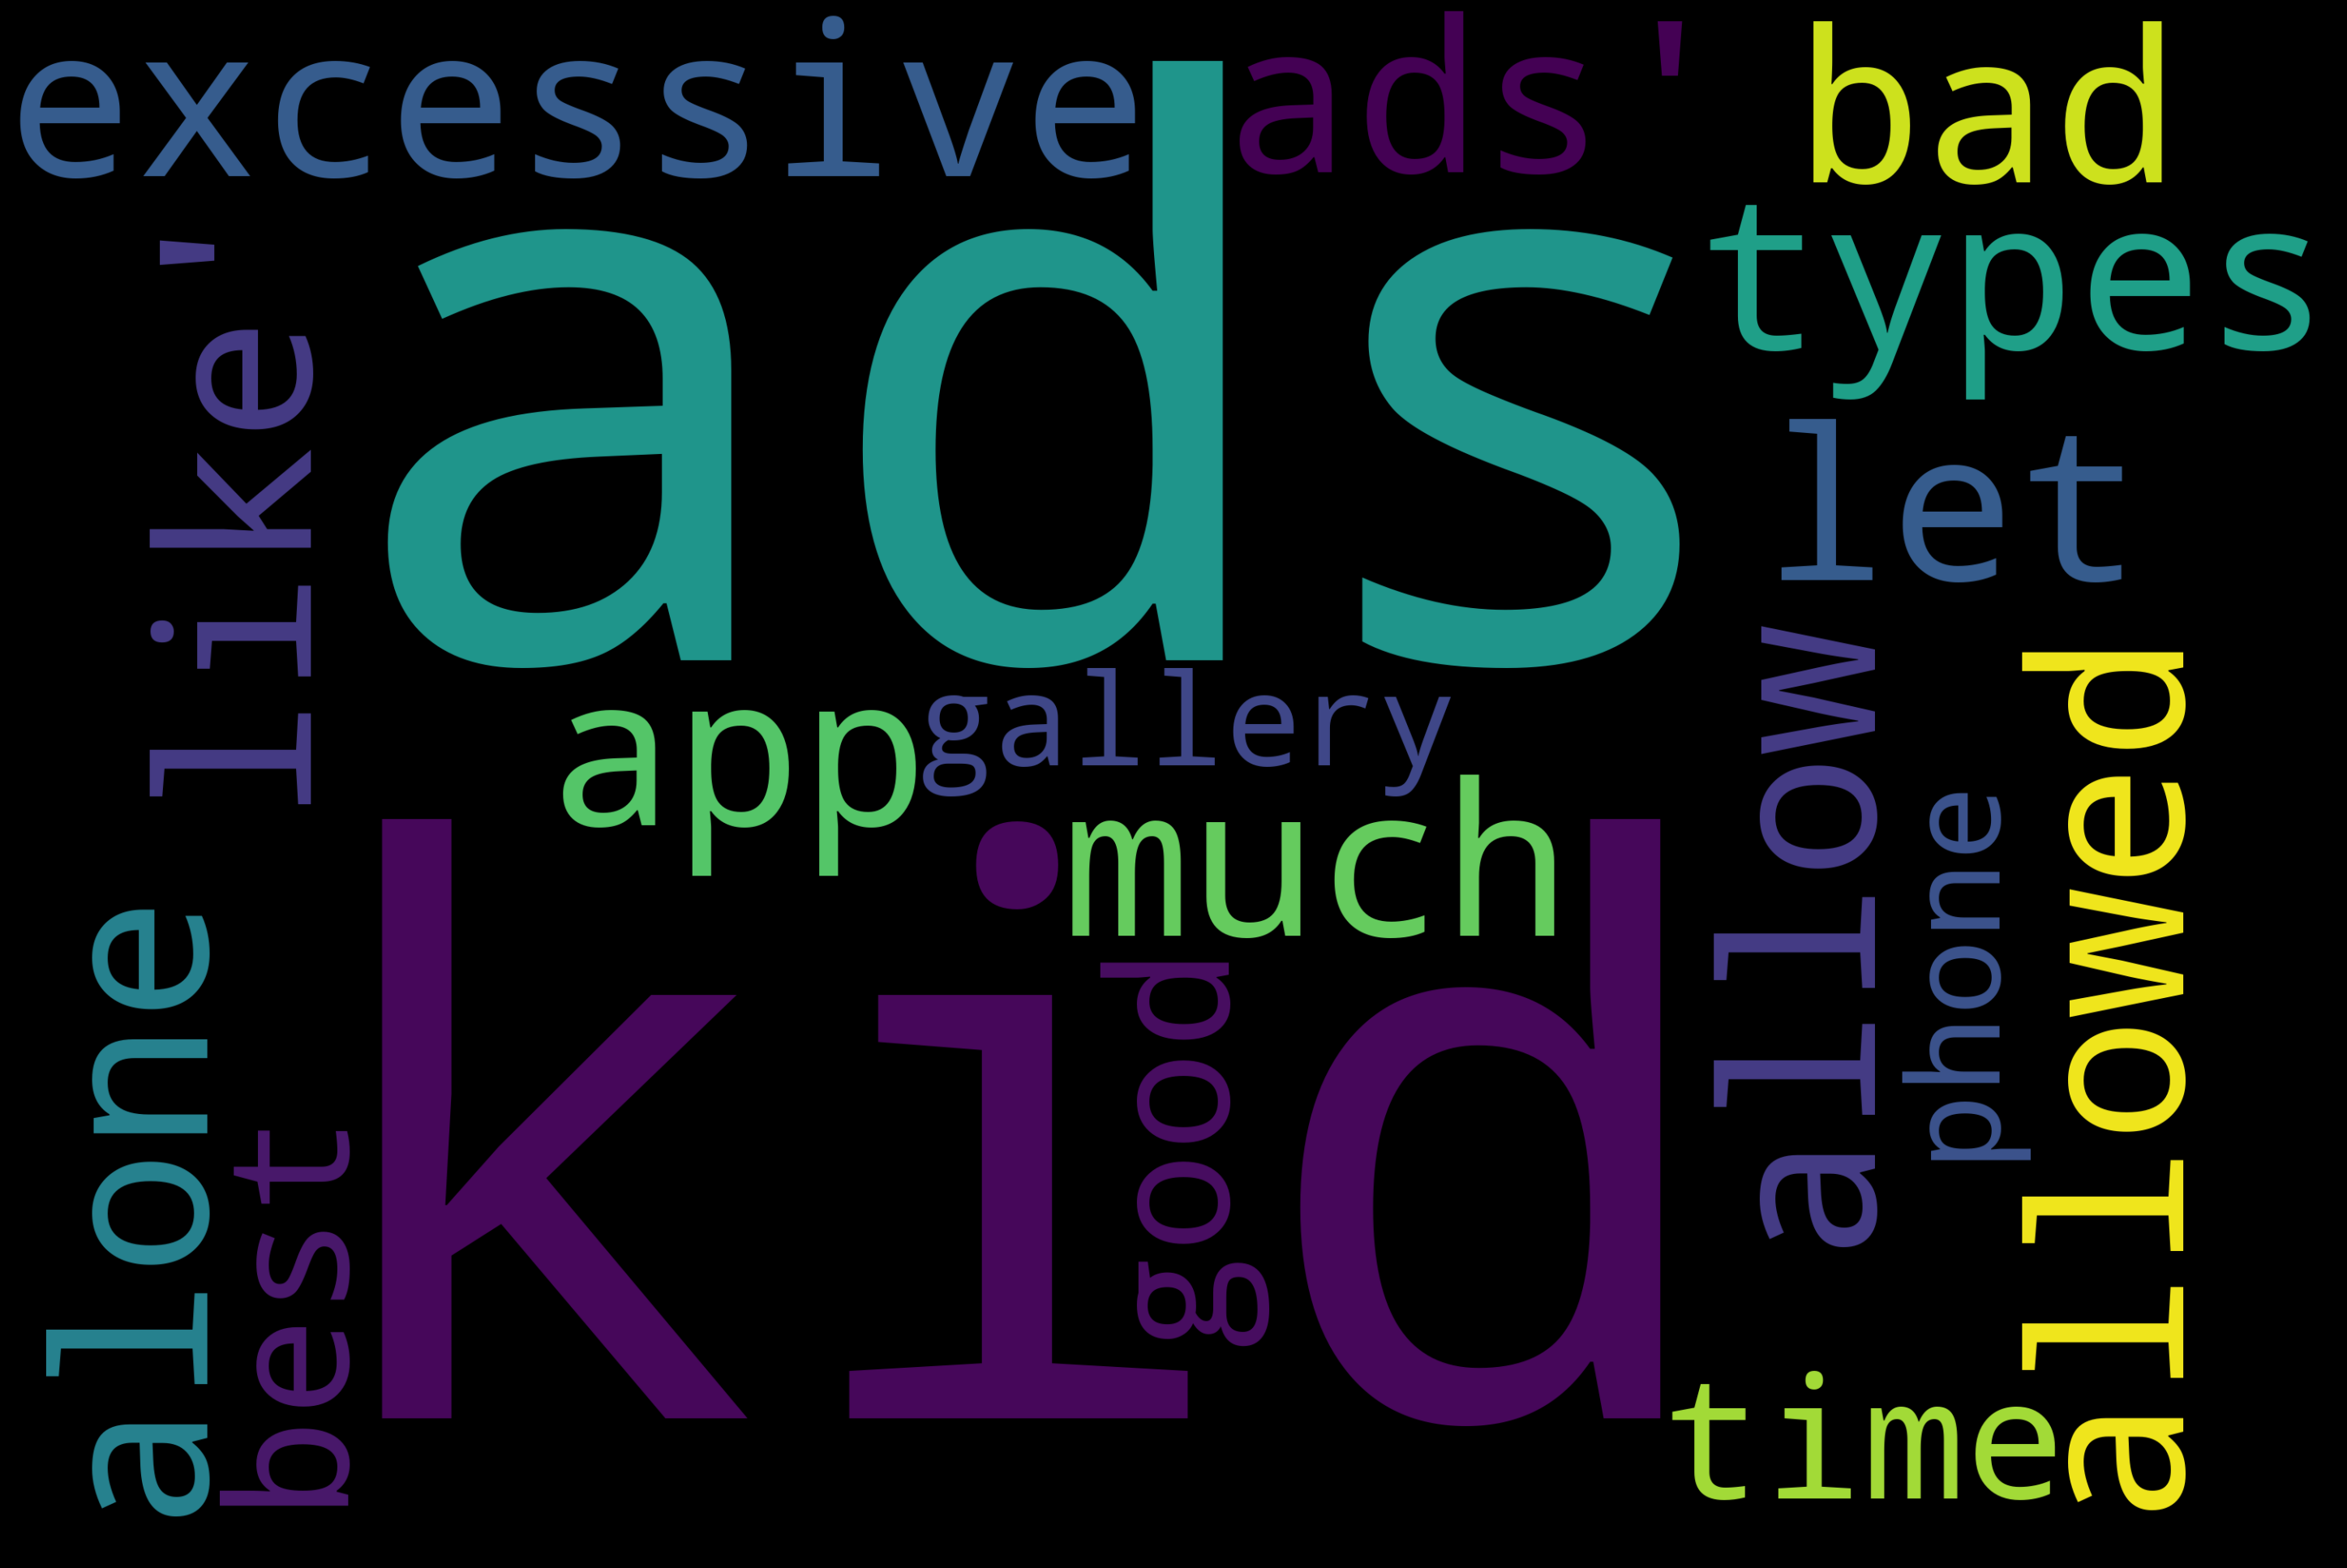

In [70]:
from wordcloud import WordCloud, STOPWORDS

text = review_not_null.Translated_Review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text).lower())

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k'
)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

**Percentage of Review Sentiments**

In [71]:
counts = list(merge_df['Sentiment'].value_counts())
counts

[23073, 8005, 4856]

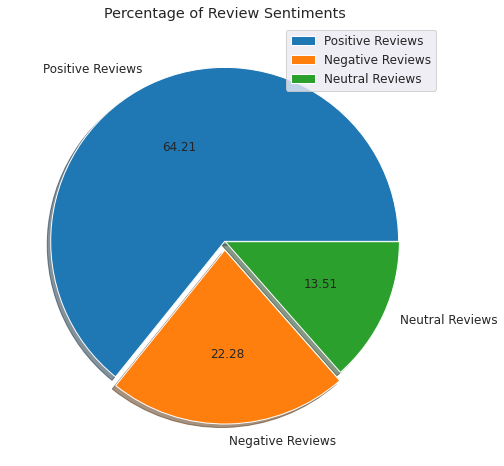

In [72]:
labels = 'Positive Reviews', 'Negative Reviews', 'Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels = labels, explode = [0, 0.05, 0.005], shadow = True, autopct = '%.2f')
plt.title('Percentage of Review Sentiments')
plt.axis('off')
plt.legend()
plt.show()